1. Load libraries

In [1]:
# Load the following libraries, sometimes called dependencies.
# short recap: pandas is used to load and manipulate datasets, numpy is used for numerical operations 
# (linear algebra)
import pandas as pd
import numpy as np
import random as rnd
import os

# visualization libraries, seaborn is an extention to matplotlib
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

2. Load data

In [2]:
# if the train and test set are in the same folder as printed below, we can load the data into pandas DataFrames
train_df = pd.read_csv('./dataNietOpgeschoond.csv')
test_df = pd.read_csv('./dataNietOpgeschoond.csv')
test_df.drop(columns=['label'], inplace=True)
combined_df = pd.concat([train_df, test_df], axis=0) # This dataframe contains both the train AND test data.

3. Data exploratie

In [3]:
print(combined_df.columns.values)

['filename' 'chroma_stft' 'rmse' 'spectral_centroid' 'spectral_bandwidth'
 'rolloff' 'zero_crossing_rate' 'mfcc1' 'mfcc2' 'mfcc3' 'mfcc4' 'mfcc5'
 'mfcc6' 'mfcc7' 'mfcc8' 'mfcc9' 'mfcc10' 'mfcc11' 'mfcc12' 'mfcc13'
 'mfcc14' 'mfcc15' 'mfcc16' 'mfcc17' 'mfcc18' 'mfcc19' 'mfcc20' 'label']


In [4]:
print(test_df.columns.values)

['filename' 'chroma_stft' 'rmse' 'spectral_centroid' 'spectral_bandwidth'
 'rolloff' 'zero_crossing_rate' 'mfcc1' 'mfcc2' 'mfcc3' 'mfcc4' 'mfcc5'
 'mfcc6' 'mfcc7' 'mfcc8' 'mfcc9' 'mfcc10' 'mfcc11' 'mfcc12' 'mfcc13'
 'mfcc14' 'mfcc15' 'mfcc16' 'mfcc17' 'mfcc18' 'mfcc19' 'mfcc20']


In [5]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Data columns (total 28 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   filename            194 non-null    object 
 1   chroma_stft         194 non-null    float64
 2   rmse                194 non-null    float64
 3   spectral_centroid   194 non-null    float64
 4   spectral_bandwidth  194 non-null    float64
 5   rolloff             194 non-null    float64
 6   zero_crossing_rate  194 non-null    float64
 7   mfcc1               194 non-null    float64
 8   mfcc2               194 non-null    float64
 9   mfcc3               194 non-null    float64
 10  mfcc4               194 non-null    float64
 11  mfcc5               194 non-null    float64
 12  mfcc6               194 non-null    float64
 13  mfcc7               194 non-null    float64
 14  mfcc8               194 non-null    float64
 15  mfcc9               194 non-null    float64
 16  mfcc10  

In [6]:
train_df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,193.000000,194.000000,194.000000
mean,0.399802,0.042629,1587.251249,1681.015580,3267.054227,0.074699,-351.093116,111.055662,-5.642505,239.468400,-4.993401,6.813506,-10.265291,0.743970,-8.501067,0.975593,-1.234208,-4.546232,3.241973,-6.372514,5.082730,-5.403393,0.221574,-0.745423,-0.162568,9.458730,2.061856
std,0.054000,0.035035,298.778768,168.351702,582.190406,0.025182,59.320890,17.192918,16.618537,2797.843693,10.487205,10.441249,7.832262,7.315269,5.460874,4.522115,4.698067,3.966593,4.333239,4.340235,4.489977,4.196222,4.281291,3.190601,3.162106,136.538780,1.036279
min,0.290601,0.005375,1052.794856,1363.914621,2169.453548,0.027892,-508.605303,60.225501,-67.969429,-2.866396,-30.487328,-24.070507,-36.435312,-18.154538,-26.652792,-13.677716,-12.254006,-16.497470,-8.957103,-19.569922,-8.136802,-15.930112,-8.220355,-9.083312,-8.265202,-7.773803,1.000000
25%,0.357296,0.019401,1373.514181,1561.681196,2866.211835,0.058938,-391.959892,100.672818,-16.725526,30.339949,-11.759638,0.110454,-15.811538,-3.689158,-11.520802,-2.262591,-4.669880,-6.896323,0.444503,-9.483368,1.805560,-8.204025,-2.841185,-2.948325,-2.202283,-2.887600,1.000000
50%,0.403616,0.029790,1542.754051,1657.270905,3183.955747,0.069365,-359.158259,113.023816,-5.143213,39.279659,-4.843928,6.095922,-9.605435,-0.169270,-7.996117,1.014168,-1.707964,-4.591496,3.106520,-6.180078,4.918851,-4.971027,-0.129220,-0.996352,-0.173086,-1.163772,2.000000
75%,0.434126,0.056821,1736.154348,1783.408685,3628.051308,0.088460,-313.393623,122.642878,4.699403,48.128701,3.112273,12.788094,-5.083826,6.232250,-4.904429,4.842797,1.486145,-1.862435,6.644120,-3.591542,8.133277,-2.332622,2.662231,1.615185,1.741235,1.771492,2.000000
max,0.558558,0.215828,2703.179320,2141.562588,5308.284568,0.173772,-185.238352,152.115144,36.028808,39007.650877,20.106426,32.750004,9.372186,20.790079,8.630891,10.719122,16.751359,5.589539,13.932120,4.115695,16.214827,6.295963,15.506280,8.002700,8.398640,1900.571084,5.000000


In [10]:
# train_df = pd.get_dummies(train_df)
# train_df.describe()

,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label,filename_D11_TM.wav,filename_D12_TM.wav,filename_D13_TM.wav,filename_D14_TM.wav,filename_D15_TM.wav,filename_D17_TM.wav,filename_D18_TM.wav,filename_D19_TM.wav,filename_D20_TM.wav,filename_D21_TM.wav,filename_D22_TM.wav,filename_D23_TM.wav,filename_D24_TM.wav,...,filename_N36_TM.wav,filename_N38_TM.wav,filename_N40_TM.wav,filename_N42_TM.wav,filename_N43_TM.wav,filename_N45_TM.wav,filename_N47_TM.wav,filename_N49_TM.wav,filename_N53_TM.wav,filename_N55_TM.wav,filename_N56_TM.wav,filename_N57_TM.wav,filename_N58_TM.wav,filename_N59_TM.wav,filename_N60_TM.wav,filename_N61_TM.wav,filename_N62_TM.wav,filename_N63_TM.wav,filename_N64_TM.wav,filename_N65_TM.wav,filename_N66_TM.wav,filename_N67_TM.wav,filename_N68_TM.wav,filename_N69_TM.wav,filename_N70_TM.wav,filename_N71_TM.wav,filename_N72_TM.wav,filename_N73_TM.wav,filename_N74_TM.wav,filename_N75_TM.wav,filename_N95_TM.wav,filename_N96_TM.wav,filename_N97_TM.wav,filename_N98_TM.wav,filename_V1_TM.wav,filename_V3_TM.wav,filename_V4_TM.wav,filename_V5_TM.wav,filename_V7_TM.wav,filename_V8_TM.wav
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,193.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,...,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,0.399802,0.042629,1587.251249,1681.015580,3267.054227,0.074699,-351.093116,111.055662,-5.642505,239.468400,-4.993401,6.813506,-10.265291,0.743970,-8.501067,0.975593,-1.234208,-4.546232,3.241973,-6.372514,5.082730,-5.403393,0.221574,-0.745423,-0.162568,9.458730,2.061856,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.010309,0.005155,...,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155,0.005155
std,0.054000,0.035035,298.778768,168.351702,582.190406,0.025182,59.320890,17.192918,16.618537,2797.843693,10.487205,10.441249,7.832262,7.315269,5.460874,4.522115,4.698067,3.966593,4.333239,4.340235,4.489977,4.196222,4.281291,3.190601,3.162106,136.538780,1.036279,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.101271,0.071796,...,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796,0.071796
min,0.290601,0.005375,1052.794856,1363.914621,2169.453548,0.027892,-508.605303,60.225501,-67.969429,-2.866396,-30.487328,-24.070507,-36.435312,-18.154538,-26.652792,-13.677716,-12.254006,-16.497470,-8.957103,-19.569922,-8.136802,-15.930112,-8.220355,-9.083312,-8.265202,-7.773803,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000

In [13]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 194 entries, 0 to 193
Columns: 206 entries, chroma_stft to filename_V8_TM.wav
dtypes: float64(26), int64(1), uint8(179)
memory usage: 75.0 KB


In [7]:
missing_data = pd.DataFrame({'total_missing': train_df.isnull().sum(), 'perc_missing': (train_df.isnull().sum()/82790)*100})
missing_data

,total_missing,perc_missing
filename,0,0.000000
chroma_stft,0,0.000000
rmse,0,0.000000
spectral_centroid,0,0.000000
spectral_bandwidth,0,0.000000
rolloff,0,0.000000
zero_crossing_rate,0,0.000000
mfcc1,0,0.000000
mfcc2,0,0.000000
mfcc3,0,0.000000


Plot om waardes te zien die buiten de verzameling vallen

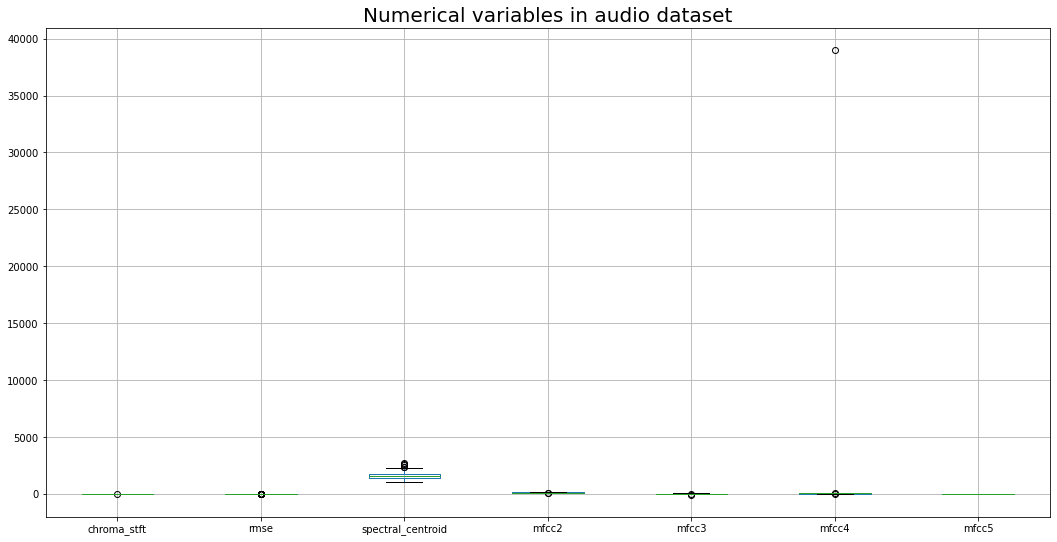

In [8]:
num_cols = ['chroma_stft', 'rmse', 'spectral_centroid', 'mfcc2', 'mfcc3', 'mfcc4', 'mfcc5']
plt.figure(figsize=(18,9))
train_df[num_cols].boxplot()
plt.title("Numerical variables in audio dataset", fontsize=20)
plt.show()

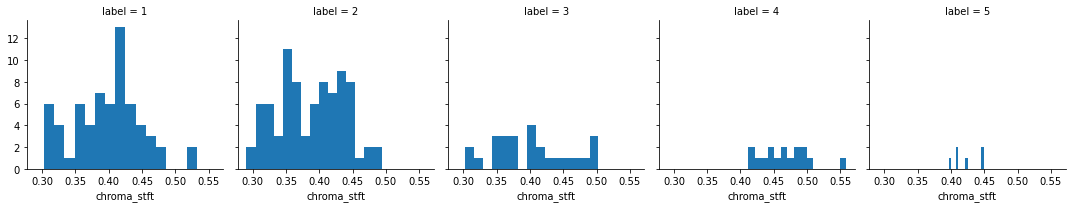

In [31]:
g = sns.FacetGrid(train_df, col='label')
g.map(plt.hist, 'chroma_stft', bins=15)

In [ ]:
sns.pairplot(train_df.dropna(), hue="label")


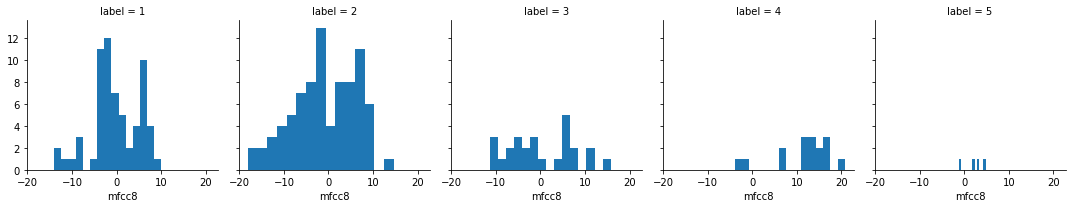

In [35]:
g = sns.FacetGrid(train_df, col='label')
g.map(plt.hist, 'mfcc8', bins=15)

In [ ]:
## fix wrong datavalues when numeric
train_df.loc[train_df['label'] == 5, 'label'] = 6
train_df['label'].unique()

## fix wrong datavalue when string
train_df.loc[train_df['label'] == '5', 'label'] = '6'
train_df['label'].unique()

MODELS trainen en testen


In [83]:
# dataframe cross validating
import pandas
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVR
from sklearn.model_selection import cross_val_score
import numpy as np

# test_df.drop(columns=['filename'], inplace=True)
# train_df.drop(columns=['filename'], inplace=True)

train_df = pd.read_csv('./dataOpgeschoond.csv')
train_df.drop(columns=['filename'], inplace=True)

X = train_df.values
y = train_df['label'].values

print(X.shape)
print(y.shape)

# cross_val_score(best_svr, X, y, cv=10)
# cross_val_predict(best_svr, X, y, cv=10)

(194, 27)
(194,)


In [91]:
# SVM

from sklearn import svm
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict

clf = svm.SVC(kernel='linear', C=1, random_state=42)
scores = cross_val_score(clf, X, y, cv=5)
# predict = cross_val_predict(clf, X, y, cv=5)
print(scores)
print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

[0.76923077 0.66666667 0.76923077 0.74358974 0.84210526]
Acuracy 0.76 (+/- 0.11)


In [89]:
# KNN

from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=4)
scores = cross_val_score(classifier, X, y, cv=5)
print(scores)
print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

[0.46153846 0.43589744 0.43589744 0.53846154 0.55263158]
Acuracy 0.48 (+/- 0.10)


In [97]:
# Random forest
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=50, random_state=10)
scores = cross_val_score(rf, X, y, cv=5)
print(scores)
print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

[0.8974359  0.92307692 0.97435897 0.8974359  0.94736842]
Acuracy 0.93 (+/- 0.06)


In [ ]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier

clf = DecisionTreeClassifier(random_state=10)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

In [ ]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression
# X, y = load_iris(return_X_y=True)
clf = LogisticRegression(random_state=0)
scores = cross_val_score(clf, X, y, cv=5)
print(scores)
print ('Acuracy %0.2f (+/- %0.2f)' % (scores.mean(), scores.std() *2))

In [30]:
# machine learning models
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier